In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-3.4.7.28:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.7.28.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libQtCore-9549151f.so.4.8.7
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libQtGui-6d0f14dd.so.4.8.7
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libavcodec-eac15e48.so.58.21.104
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libavformat-b6bcbe33.so.58.17.101
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libavutil-e1b1a17d.so.56.18.102
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libswresample-b4363bfa.so.3.2.100
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libswscale-15b3fdc6.so.5.2.100
    /usr/local/lib/python3.6/dist-packages/cv2/.libs/libvpx-81a43c0a.so.5.0.0
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.7.28
Uninstalling opencv-contrib-python-3.4.

#Question 1

NC would perform better. 

Reason: We first list the matching cost functions for both SSD and NC methods.
$SSD\left(\text { patch }_{l}, \text { patch }_{r}\right)=\sum_{x} \sum_{y}\left(I_{\text {patch }_{l}}(x, y)-I_{\text {patch }_{r}}(x, y)\right)^{2}$
$NC\left(\text { patch }_{l}, \text { patch }_{r}\right)=\frac{\sum_{x} \sum_{y}\left(I_{\text {patch }_{l}}(x, y) \cdot I_{\text {patch }_{r}}(x, y)\right)}{\left\|I_{\text {patch }_{l}}\right\| \cdot\left\|I_{\text {patch }_{r}}\right\|}$

From cost functions we could observe that the cost function for SSD method depends on the difference among pixels in two images, resulting changes on exposure time might impact the dispartity image. 
In contrast, the cost function for NC method has no dependence on the difference among pixels in two images, so an alteration in exposure time would not directly impact the disparity image. Hence, the NC method for cost function would perform better. 

# Question 2

## (a)

In [0]:
import sys
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np 
import time
import cmath
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [0]:
def loadRange(path):
    with open(path,'r') as fp:
        lines=fp.readline()
        data_list=[i.strip() for i in lines.split(' ')]
        return int(float(data_list[1])),int(float(data_list[3])),int(float(data_list[2])),int(float(data_list[4]))

In [0]:
def loadParameters(path):
    with open(path,'r') as fp:
        lines=fp.readlines()
        f=float([str.strip() for str in lines[0].split(' ')][1])
        px=float([str.strip() for str in lines[1].split(' ')][1])
        py=float([str.strip() for str in lines[2].split(' ')][1])
        baseline=float([str.strip() for str in lines[3].split(' ')][1])
    return f,px,py,baseline

BELOW IS THE SSD DEPTH IMAGE


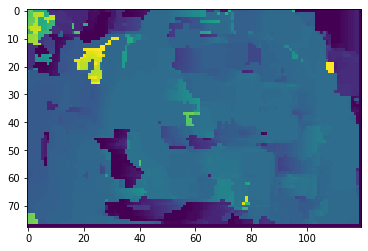

BELOW IS THE SSD RIGHT PATCH IMAGE


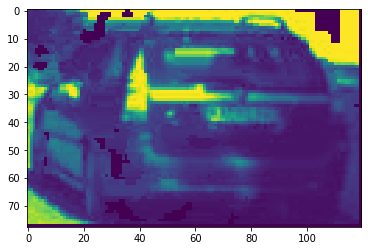

BELOW IS THE NC DEPTH IMAGE


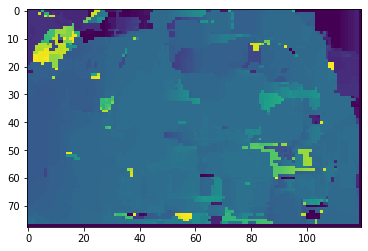

BELOW IS THE NC RIGHT PATCH IMAGE


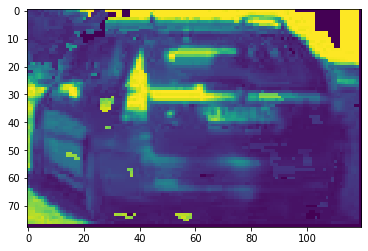

In [25]:
def SSD(left_image,right_image,patch_size):
    path_range='/content/drive/My Drive/Colab Notebooks/A4/000020.txt'
    xlmin,xlmax,ylmin,ylmax=loadRange(path_range)
    path_allcalib='/content/drive/My Drive/Colab Notebooks/A4/000020_allcalib.txt'
    f,px,py,baseline=loadParameters(path_allcalib)
    maxoffset=79
    middlepatch=int((patch_size-1)/2)
    ssd_right_patch_image=np.zeros((int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1),np.uint8)
    ssd_depth_image=np.zeros((int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1),np.uint8)
    for y in range(ylmin,ylmax):
        for x in range(xlmin,xlmax):
            min_SSD_cost=100000000
            best_disparity=0
            for offset in range(maxoffset):
                ssd_temp=0
                for u in range(-middlepatch,middlepatch):
                    for v in range (-middlepatch,middlepatch):
                        ssd_temp+=pow(int(left_image[y+v,x+u])-int(right_image[y+v,x+u-offset]),2)
                if ssd_temp < min_SSD_cost:
                    min_SSD_cost=ssd_temp
                    best_disparity= offset
            if best_disparity!=0:
                depth=int((f*baseline)/best_disparity)
                ssd_depth_image[y-ylmin,x-xlmin]=best_disparity
                ssd_right_patch_image[y-ylmin,x-xlmin]=right_image[y,x-best_disparity] 
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/SSD_rightPatchImage.png',ssd_right_patch_image)
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/SSD_depthImage.png', ssd_depth_image) 
    return ssd_depth_image,ssd_right_patch_image

def NC(left_image,right_image,patch_size):
    path_range='/content/drive/My Drive/Colab Notebooks/A4/000020.txt'
    xlmin,xlmax,ylmin,ylmax=loadRange(path_range)
    path_calib='/content/drive/My Drive/Colab Notebooks/A4/000020_allcalib.txt'
    f,px,py,baseline=loadParameters(path_calib)
    max_disparity=79
    middle_patch=int((patch_size-1)/2)
    nc_right_patch_image=np.zeros((int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1),np.uint8)
    nc_depth_image=np.zeros((int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1),np.uint8)
    for y in range(ylmin,ylmax):
        for x in range(xlmin,xlmax):
            maxNC=0
            best_disparity=0
            for offset in range(max_disparity):
                nc_temp=0
                norm1=0
                norm2=0
                for u in range(-middle_patch,middle_patch):
                    for v in range (-middle_patch,middle_patch):
                        nc_temp+=int(left_image[y+v,x+u])*int(right_image[y+v,x+u-offset])
                        norm1+=int(left_image[y+v,x+u])*int(left_image[y+v,x+u])
                        norm2+=int(right_image[y+v,x+u-offset])*int(right_image[y+v,x+u-offset])
                nc_temp=nc_temp/((norm1**0.5)*(norm2**0.5))
                if nc_temp>maxNC:
                    maxNC=nc_temp
                    best_disparity= offset
            if best_disparity!=0:
                depth=int((f*baseline)/best_disparity)
                nc_depth_image[y-ylmin,x-xlmin]=best_disparity
                nc_right_patch_image[y-ylmin,x-xlmin]=right_image[y,x-best_disparity] 
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/NC_rightPatchImage.png', nc_right_patch_image)
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/NC_depthImage.png',nc_depth_image)   
    return nc_depth_image, nc_right_patch_image

if __name__== "__main__":
    left_image = cv.imread('/content/drive/My Drive/Colab Notebooks/A4/000020_left.jpg', 0)
    right_image = cv.imread('/content/drive/My Drive/Colab Notebooks/A4/000020_right.jpg', 0)
    ssd_depth_image, ssd_right_patch_image = SSD(left_image, right_image, 9)
    nc_depth_image, nc_right_patch_image = NC(left_image, right_image, 9)
    print("BELOW IS THE SSD DEPTH IMAGE")
    plt.imshow(ssd_depth_image)
    plt.show()
    print("========================================")
    print("BELOW IS THE SSD RIGHT PATCH IMAGE")
    plt.imshow(ssd_right_patch_image)
    plt.show()
    print("========================================")
    print("BELOW IS THE NC DEPTH IMAGE")
    plt.imshow(nc_depth_image)
    plt.show()
    print("========================================")
    print("BELOW IS THE NC RIGHT PATCH IMAGE")
    plt.imshow(nc_right_patch_image)
    plt.show()

patch size: 9

sampling method: For every pixel in the bounding box, loop through all pixels within its corresponding patch and determine the minimum matching cost and best disparity for such pixel. 

matching cost function: $SSD\left(\text { patch }_{l}, \text { patch }_{r}\right)=\sum_{x} \sum_{y}\left(I_{\text {patch }_{l}}(x, y)-I_{\text {patch }_{r}}(x, y)\right)^{2}$

$NC\left(\text { patch }_{l}, \text { patch }_{r}\right)=\frac{\sum_{x} \sum_{y}\left(I_{\text {patch }_{l}}(x, y) \cdot I_{\text {patch }_{r}}(x, y)\right)}{\left\|I_{\text {patch }_{l}}\right\| \cdot\left\|I_{\text {patch }_{r}}\right\|}$

From the graph above we could state that there are some outlier points. 

## (b)

In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/A4/PSMNet'

/content/drive/My Drive/Colab Notebooks/A4/PSMNet


In [0]:
!ls

dataloader  finetune.py  main.py  README.md  submission.py  utils
dataset     LICENSE	 models   run.sh     Test_img.py


In [0]:
!python Test_img.py --loadmodel pretrained_model_KITTI2012.tar --leftimg ../000020_left.jpg --rightimg ../000020_right.jpg --isgray False

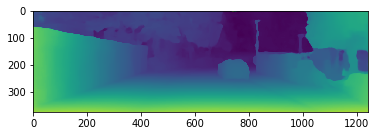

In [0]:
disparity_image = cv.imread("/content/drive/My Drive/Colab Notebooks/A4/PSMNet/disparity.png", cv.IMREAD_GRAYSCALE)
plt.imshow(disparity_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


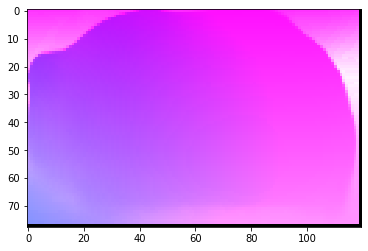

In [7]:
def loadDisparityImageFromModel(path):
    path_range='/content/drive/My Drive/Colab Notebooks/A4/000020.txt'
    xlmin,xlmax,ylmin,ylmax=loadRange(path_range)
    path_allcalib='/content/drive/My Drive/Colab Notebooks/A4/000020_allcalib.txt'
    f,px,py,baseline=loadParameters(path_allcalib)
    model_disparity_image=cv.imread(path,0)
    model_depth_image=np.zeros([int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1,3],np.float32)
    for row in range(ylmin,ylmax):
        for col in range(xlmin,xlmax):
            depth=(f*baseline)/model_disparity_image[row,col]
            model_depth_image[row-ylmin,col-xlmin,2]=depth
            model_depth_image[row-ylmin,col-xlmin,0]=(col-px)*depth/f
            model_depth_image[row-ylmin,col-xlmin,1]=(row-py)*depth/f
    return model_depth_image

if __name__== "__main__":
    model_depth_image = loadDisparityImageFromModel('/content/drive/My Drive/Colab Notebooks/A4/PSMNet/disparity.png')
    plt.imshow(model_depth_image)
    plt.show()
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/model_depth_image.png', model_depth_image)

I choose PSMNet. Using pretrained model could increase the result of the disparity image both in terms of image quality and running speed. The resulting disparity image I got has many outliers and could hardly distinguish the shape of a car, but the disparity image calculated by PSMNet looks super clean and smooth and has bearly any outliers, and we could easily tell the shape of a car from it. 
The running time for my algorithm to execute with patch size as 9 is roughly around 1.5 minutes, but the running time for the pretrianed PSMNet model takes only few seconds, so the running speed for using pretrained PSMNet is way faster. 

##(c)

The model I choose is PSMNet. 

Github link:
https://github.com/JiaRenChang/PSMNet/blob/master/README.md

Paper link: 
http://openaccess.thecvf.com/content_cvpr_2018/papers/Chang_Pyramid_Stereo_Matching_CVPR_2018_paper.pdf

Structure: ![替代文字](https://drive.google.com/uc?id=1fjjcSaMK2qZD49S0kr5ODenZxyjY14gJ)

From the structure we know the input images are the left and right stereo images, and the PSMNet use two weight sharing pipelines to handle these two input images. Each pipeline consists of a CNN feature map calculation, a SPP module for feature collection, and a convolutinal layer for feature fusion. Then the PSMNet form a 4D cost volumne, and a 3D CNN cost volume for regularization and disparity regression, then we could get the resulting image.




## (d)

In [0]:
def checkBorders(x,y,image,path_size):
    if x==0 and y==0:
        return  x,y,x+1+(path_size-1)/2,y+1+(path_size-1)/2
    elif x==0 and y==(image.shape)[0]-1:
        return x,y-(path_size-1)/2,y

In [0]:
def computeDistance(left_point,right_point):
    return (pow(left_point[0]-right_point[0],2)+pow(left_point[1]-right_point[1],2)+pow(left_point[2]-right_point[2],2))**0.5

In [0]:
def get2dBox(model_depth_image,threshold):
    path_range='/content/drive/My Drive/Colab Notebooks/A4/000020.txt'
    xlmin,xlmax,ylmin,ylmax=loadRange(path_range)
    path_allcalib='/content/drive/My Drive/Colab Notebooks/A4/000020_allcalib.txt'
    f,px,py,baseline=loadParameters(path_allcalib)
    minX=minY=minZ=100
    maxX=maxY=maxZ=0
    car_seg =np.zeros((int(ylmax)-int(ylmin)+1,int(xlmax)-int(xlmin)+1),np.uint8)
    center_point=model_depth_image[int((ylmax-ylmin)/2),int((xlmax-xlmin)/2)]
    for y in range(model_depth_image.shape[0]):
        for x in range(model_depth_image.shape[1]):
            if  computeDistance(model_depth_image[y,x],center_point)<threshold:
                car_seg[y,x]=255
                if model_depth_image[y,x,0]<minX:
                    minX=model_depth_image[y,x,0]
                if model_depth_image[y,x,1]<minY:
                    minY=model_depth_image[y,x,1]
                if model_depth_image[y,x,2]<minZ:
                    minZ=model_depth_image[y,x,2] 
                if model_depth_image[y,x,0]>maxX:
                    maxX=model_depth_image[y,x,0]
                if model_depth_image[y,x,1]>maxY:
                    maxY=model_depth_image[y,x,1]
                if model_depth_image[y,x,2]>maxZ:
                    maxZ=model_depth_image[y,x,2]   
            else:
                car_seg[y,x]=0 
    return car_seg,(minX,minY,minZ),(maxX,maxY,maxZ)

In [0]:
def get3dBox(model_depth_image,min_3D_location,max_3D_location):
    fig=plt.figure()
    ax=fig.gca(projection='3d')
    ax.xaxis.set_ticks_position('top')
    ax.invert_xaxis()
    for y in range(model_depth_image.shape[0]):
        for x in range(model_depth_image.shape[1]):
            if model_depth_image[y,x,0]>min_3D_location[0] and model_depth_image[y,x,0]<max_3D_location[0] and model_depth_image[y,x,1]>min_3D_location[1] and model_depth_image[y,x,1]<max_3D_location[1] and model_depth_image[y,x,2]>min_3D_location[2] and model_depth_image[y,x,2]<max_3D_location[2]:
                ax.scatter3D(model_depth_image[y,x,0],model_depth_image[y,x,1],model_depth_image[y,x,2],cmap='Blues')
    ax.plot([min_3D_location[0],min_3D_location[0]],[min_3D_location[1],min_3D_location[1]],[min_3D_location[2],max_3D_location[2]])
    ax.plot([min_3D_location[0],min_3D_location[0]],[min_3D_location[1],max_3D_location[1]],[min_3D_location[2],min_3D_location[2]])
    ax.plot([min_3D_location[0],max_3D_location[0]],[min_3D_location[1],min_3D_location[1]],[min_3D_location[2],min_3D_location[2]])
    ax.plot([max_3D_location[0],max_3D_location[0]],[min_3D_location[1],min_3D_location[1]],[min_3D_location[2],max_3D_location[2]])
    ax.plot([max_3D_location[0],max_3D_location[0]],[min_3D_location[1],max_3D_location[1]],[min_3D_location[2],min_3D_location[2]])
    ax.plot([min_3D_location[0],max_3D_location[0]],[min_3D_location[1],min_3D_location[1]],[max_3D_location[2],max_3D_location[2]])
    ax.plot([min_3D_location[0],min_3D_location[0]],[min_3D_location[1],max_3D_location[1]],[max_3D_location[2],max_3D_location[2]])
    ax.plot([max_3D_location[0],max_3D_location[0]],[min_3D_location[1],max_3D_location[1]],[max_3D_location[2],max_3D_location[2]])
    ax.plot([min_3D_location[0],max_3D_location[0]],[max_3D_location[1],max_3D_location[1]],[min_3D_location[2],min_3D_location[2]])
    ax.plot([min_3D_location[0],max_3D_location[0]],[max_3D_location[1],max_3D_location[1]],[max_3D_location[2],max_3D_location[2]])
    ax.plot([min_3D_location[0],min_3D_location[0]],[max_3D_location[1],max_3D_location[1]],[min_3D_location[2],max_3D_location[2]])
    ax.plot([max_3D_location[0],max_3D_location[0]],[max_3D_location[1],max_3D_location[1]],[min_3D_location[2],max_3D_location[2]])
    
    plt.savefig('/content/drive/My Drive/Colab Notebooks/A4/3dBox.png', dpi=fig.dpi)
    plt.show()

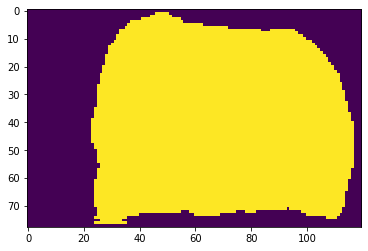

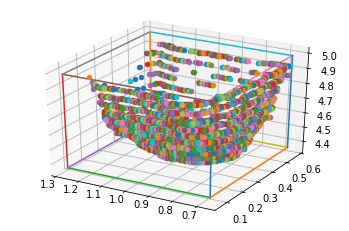

In [23]:
if __name__== "__main__":
    model_depth_image = loadDisparityImageFromModel('/content/drive/My Drive/Colab Notebooks/A4/PSMNet/disparity.png')
    is_car_part_image,min_3d_location,max_3d_location = get2dBox(model_depth_image,0.6)
    plt.imshow(is_car_part_image)
    plt.show()
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/2dBox.png', model_depth_image)
    get3dBox(model_depth_image,min_3d_location,max_3d_location)

The classification threshold for  distance I choose is 0.6.

#Question 3

## (a)

In [0]:
img1 = cv.imread('/content/drive/My Drive/Colab Notebooks/A4/I1_original.jpg', cv.IMREAD_GRAYSCALE)
img1 = cv.resize(img1, (int(img1.shape[0]* 0.3), int(img1.shape[0]* 0.3)))
cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', img1)

img2 = cv.imread('/content/drive/My Drive/Colab Notebooks/A4/I2_original.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.resize(img2, (int(img2.shape[0]* 0.3), int(img2.shape[0]* 0.3)))
cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I2.jpg', img2)

img3 = cv.imread('/content/drive/My Drive/Colab Notebooks/A4/I3_original.jpg', cv.IMREAD_GRAYSCALE)
img3 = cv.resize(img3, (int(img3.shape[0]* 0.3), int(img3.shape[0]* 0.3)))
cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I3.jpg', img3)

In [0]:
def mySIFT(img1_path, img2_path):
    img1 = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

    sift = cv.xfeatures2d.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    goodMatches = []
    for m, n in matches:
        if m.distance < 0.6*n.distance:
            goodMatches.append([m])

    all_pairs = cv.drawMatchesKnn(img1, kp1, img2,
                             kp2, goodMatches, None,flags=2)
    plt.imshow(all_pairs)
    plt.show()

    if (img2_path == '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg'):
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1_I2_all_pairs.png', all_pairs)
    else:
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1_I3_all_pairs.png', all_pairs)

    new_matches, pts1, pts2 = pick8Points(img1.shape[1], img1.shape[0], goodMatches, kp1, kp2)

    img3 = np.concatenate((img1, img2), axis=1)
    img3 = cv.cvtColor(img3, cv.COLOR_GRAY2RGB)

    for i in range(len(pts1)):
        l_pt = pts1[i]
        r_pt = pts2[i]
        r, g, b = random.randint(100, 255), random.randint(100, 255), random.randint(100, 255)
        cv.circle(img3, (int(l_pt[0]), int(l_pt[1])), 10, (r + 30, g + 30, b + 30), thickness=3)
        cv.circle(img3, (int(r_pt[0] + img1.shape[0]), int(r_pt[1])), 10, (r + 30, g + 30, b + 30), thickness=3)
        cv.line(img3, (int(l_pt[0]), int(l_pt[1])), (int(r_pt[0] + img1.shape[0]), int(r_pt[1])), (r, g, b), 3) 

    plt.imshow(img3)
    plt.show()

    if (img2_path == '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg'):
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1_I2_8_pairs.png', img3)
    else:
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1_I3_8_pairs.png', img3)


    return pts1, pts2



In [0]:
def pick8Points(img_width, img_height, matches, kp1, kp2):
    pts1 = [(-1, -1) for i in range(8)]
    pts2 = [(-1, -1) for i in range(8)]
    dis = [10000 for i in range(8)]
    new_matches = [matches[0] for i in range(8)]

    backup1 = []
    backup2 = []
    backupm = []

    col_span = img_width // 3
    row_span = img_height // 3
    for m in matches:
        pt1 = kp1[m[0].queryIdx].pt
        pt2 = kp2[m[0].trainIdx].pt

        i = -1
        if pt1[0] < col_span and pt1[1] < row_span and m[0].distance < dis[0]:
            i = 0
        elif pt1[0] >= col_span and pt1[0] < 2 * col_span and pt1[1] < row_span and m[0].distance < dis[1]:
            i = 1
        elif pt1[0] >= 2 * col_span and pt1[1] < row_span and m[0].distance < dis[2]:
            i = 2
        elif pt1[0] < col_span and pt1[1] < 2 * row_span and pt1[1] >= row_span and m[0].distance < dis[3]:
            i = 3
        elif pt1[0] >= 2 * col_span and pt1[1] < 2 * row_span and pt1[1] >= row_span and m[0].distance < dis[4]:
            i = 4
        elif pt1[0] < col_span and pt1[1] >= 2 * row_span and m[0].distance < dis[5]:
            i = 5
        elif pt1[0] >= col_span and pt1[0] < 2 * col_span and pt1[1] >= 2 * row_span and m[0].distance < dis[6]:
            i = 6
        elif pt1[0] >= 2 * col_span and pt1[1] >= 2 * row_span and m[0].distance < dis[7]:
            i = 7 

        if i > -1:
            if pts1[i] != (-1, -1):
                backup1.append(pts1[i])
                backup2.append(pts2[i])
                backupm.append(new_matches[i])
            pts1[i] = pt1
            pts2[i] = pt2
            new_matches[i] = m
        else:
            backup1.append(pt1)
            backup2.append(pt2)
            backupm.append(m)

    bounder = (col_span * col_span + row_span * row_span) / 4
    j = 0
    for i in range(8):
        if pts1[i] == (-1, -1) and len(backup1) > j:
            flag = True
            for l in range(j, len(backup1)):
                flag = True
                for k in range(8):
                    dist = (backup1[l][0] - pts1[k][0]) * (backup1[l][0] - pts1[k][0]) + (backup1[l][1] - pts1[k][1]) * (backup1[l][1] - pts1[k][1])
                    if i != k and dist < bounder:
                        flag = False
                        break
                if flag:
                    j = l
                    break
                
            if flag:
                pts1[i] = backup1[j]
                pts2[i] = backup2[j]
                new_matches[i] = backupm[j]
                j += 1

    j = 0
    for i in range(8):
        if (pts1[i] == (-1, -1)):
            flag = True
            for l in range(j, len(backup1)):
                flag = True
                for k in range(8):
                    if i != k and (pts1[k] == backup1[l]):
                        flag = False
                        break
                if flag:
                    j = l
                    break
            if flag:
                pts1[i] = backup1[j]
                pts2[i] = backup2[j]
                new_matches[i] = backupm[j]
                j += 1

    return new_matches, np.array(pts1), np.array(pts2)

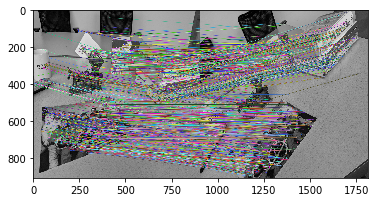

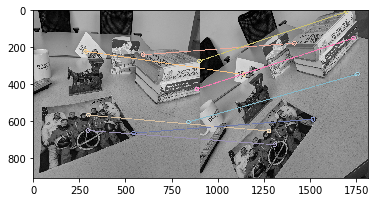

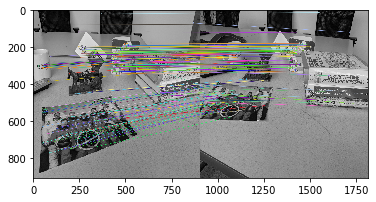

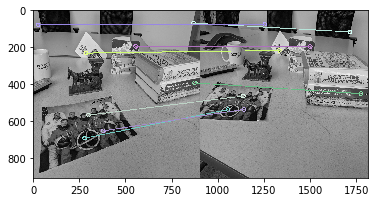

In [30]:
pts1, pts2 = mySIFT('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg')
pts3, pts4 = mySIFT('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I3.jpg')

## (b)

In [0]:
def calFundamental(pts1, pts2):
    A = np.zeros(shape=(len(pts1), 9))
    for i in range(len(pts1)):
        x_l, y_l = pts1[i][0], pts1[i][1]
        x_r, y_r = pts2[i][0], pts2[i][1]
        A[i][0] = x_l * x_r
        A[i][1] = x_r * y_l
        A[i][2] = x_r
        A[i][3] = y_r * x_l
        A[i][4] = y_r * y_l
        A[i][5] = y_r
        A[i][6] = x_l
        A[i][7] = y_l
        A[i][8] = 1
    u, s, vh = np.linalg.svd(A)
    f = vh[-1].reshape(3, 3)
    u, s, vh = np.linalg.svd(f)
    s[-1] = 0
    s = np.diag(s)
    f = np.dot(np.dot(u, s), vh)
    return f

In [200]:
F_12 = calFundamental(pts1, pts2)
F_13 = calFundamental(pts3, pts4)
print("F12: \n", F_12)
print("F13: \n", F_13)

F12: 
 [[ 1.91616168e-06 -2.89116255e-06  3.18358143e-03]
 [ 2.90072679e-06  1.10083829e-06 -2.26825705e-03]
 [-4.80837972e-03  3.08203777e-04  9.99980752e-01]]
F13: 
 [[ 1.61805847e-06  2.55363434e-05 -2.50181584e-03]
 [-2.14897962e-05  1.85874050e-05 -7.58600594e-03]
 [ 1.72634938e-03 -4.91644465e-03  9.99954519e-01]]


## (c)

In [0]:
def plotEpipolarLines(img_path, F, pts1, pts2):
    img_gray = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    img = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
    lines1 = cv.computeCorrespondEpilines(pts1, 1, F)

    for line in lines1:
        cv.line(img,
            (0, int(-line[0, 2]/line[0, 1])), 
            (img_gray.shape[1], -int((line[0, 2] + line[0, 0] * img_gray.shape[1])/line[0, 1])),
            (255, 0, 0), thickness = 10)

    for pt in pts2:
        cv.circle(img, (int(pt[0]), int(pt[1])), 5, (0, 255, 255), thickness=5)

    plt.imshow(img)
    plt.show()
    if (img_path == '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg'):
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I2-epipolar_lines.png', img)
    cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I3-epipolar_lines.png', img)

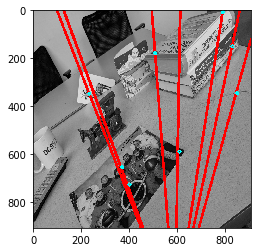

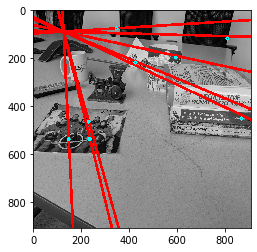

In [202]:
plotEpipolarLines('/content/drive/My Drive/Colab Notebooks/A4/I2.jpg', F_12, pts1, pts2)
plotEpipolarLines('/content/drive/My Drive/Colab Notebooks/A4/I3.jpg', F_13, pts3, pts4)

## (d)

In [0]:
def rectifyAndPlot(img1_path, img2_path, F, pts1, pts2, openCV_F=False):
    img1_gray = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
    img2_gray = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

    ret_bool, rectmat1, rectmat2 = cv.stereoRectifyUncalibrated(pts1, pts2, F, (img1_gray.shape[1], img1_gray.shape[0]))
    print(rectmat1)
    rectmat1_inv = np.linalg.inv(rectmat1)
    rectmat2 = rectmat1_inv.dot(rectmat2)
    dst2 = cv.warpPerspective(img2_gray, rectmat2, (img1_gray.shape[1], img1_gray.shape[0]))
    out = np.concatenate([img1_gray, dst2], axis=1)
    plt.imshow(out)
    plt.show()
    if (img2_path == '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg'):
        if (openCV_F == True):
            cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1-I2-openCV-rectify.png', out)
        else:
            cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1-I2-rectify.png', out)
    else:
        if (openCV_F == True):
            cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1-I3-openCV-rectify.png', out)
        else:
            cv.imwrite('/content/drive/My Drive/Colab Notebooks/A4/I1-I3-rectify.png', out)

[[ 1.03142301e-03 -1.82574642e-03 -1.72634294e+00]
 [ 3.35398455e-03  3.18772983e-03 -5.10043180e+00]
 [-2.39578401e-06  5.13826460e-06 -5.95168059e-03]]


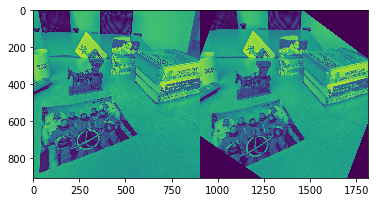

[[ 4.86036467e-03  1.38772484e-03 -1.30469529e+00]
 [-7.34003596e-05  5.75986504e-03 -6.75786227e-01]
 [ 4.95067411e-06  2.09440131e-06  1.02015166e-03]]


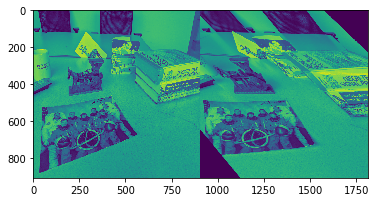

In [204]:
rectifyAndPlot('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg', F_12, pts1, pts2, openCV_F=False)
rectifyAndPlot('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I3.jpg', F_13, pts3, pts4, openCV_F=False)

## (e)

In [205]:
openCV_F12 = cv.findFundamentalMat(pts1, pts2, cv.FM_8POINT)
print("OPEN CV F_12: \n", openCV_F12[0])
print("MY CALCULATED F_12: \n", F_12)
print("=========================================================")
openCV_F13 = cv.findFundamentalMat(pts3, pts4, cv.FM_8POINT)
print("OPEN CV F_13: \n", openCV_F13[0])
print("MY CALCULATED F_13: \n", F_13)

OPEN CV F_12: 
 [[ 1.90587129e-06 -2.89110790e-06  3.17155415e-03]
 [ 2.86370616e-06  1.12828749e-06 -2.27099964e-03]
 [-4.78379273e-03  2.87896549e-04  1.00000000e+00]]
MY CALCULATED F_12: 
 [[ 1.91616168e-06 -2.89116255e-06  3.18358143e-03]
 [ 2.90072679e-06  1.10083829e-06 -2.26825705e-03]
 [-4.80837972e-03  3.08203777e-04  9.99980752e-01]]
OPEN CV F_13: 
 [[ 1.95670625e-06  2.49076773e-05 -2.47726386e-03]
 [-2.08148786e-05  1.81326008e-05 -7.45669999e-03]
 [ 1.66376147e-03 -4.83196726e-03  1.00000000e+00]]
MY CALCULATED F_13: 
 [[ 1.61805847e-06  2.55363434e-05 -2.50181584e-03]
 [-2.14897962e-05  1.85874050e-05 -7.58600594e-03]
 [ 1.72634938e-03 -4.91644465e-03  9.99954519e-01]]


The fundamental matrix I got is quite similar to the fundamental matrix calculated by OpenCV. There might still exist some number differences for some entries, but the scales for all entries are the same, so the fundamental matrix I calculated is acceptable.  

## (e)

[[ 1.14342925e-03 -2.11303518e-03 -1.70434693e+00]
 [ 3.36241906e-03  3.20109352e-03 -5.07909219e+00]
 [-2.34471875e-06  5.14260218e-06 -5.94086948e-03]]


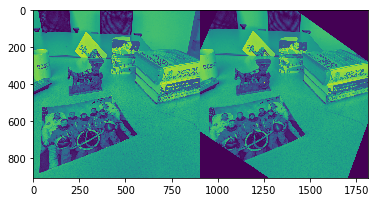

[[ 4.52792851e-03  1.62200552e-03 -1.31936571e+00]
 [ 3.01505395e-05  5.65388670e-03 -6.67565134e-01]
 [ 4.95112096e-06  2.03780209e-06  1.01521181e-03]]


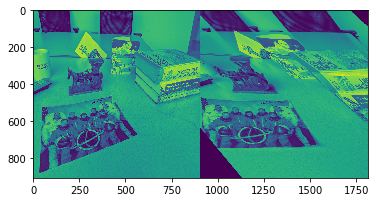

In [206]:
rectifyAndPlot('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I2.jpg', openCV_F12[0], pts1, pts2, openCV_F=True)
rectifyAndPlot('/content/drive/My Drive/Colab Notebooks/A4/I1.jpg', '/content/drive/My Drive/Colab Notebooks/A4/I3.jpg', openCV_F13[0], pts3, pts4, openCV_F=True)

Compare with the rectification effects got by myself, the rectification effects calculated by OpenCV might has some minor improvements, but since the fundamental matrix I got are pretty similar to the fundamental matrix calculated by OpenCV, the resulting images for rectification are pretty much the same. 